# Airline - tweeter Sentiment analysis 
 * (Use Case - 3)
 * By Ujjwal Jha

In [14]:
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize

nltk.download()
plt.style.use('fivethirtyeight')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [23]:
tweeterData = pd.read_csv("C:\\Users\\ujjwalkj\\Downloads\\technicaltestfromjet2traveltechnologies\\Usecase3_Dataset_1.csv", 
                          encoding ='utf-8')
df = pd.DataFrame(tweeterData)
df.head()
#df['airline'].unique()
#df['airline_sentiment'].unique()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


##### Cleaning the Dataset by removing the unnecessory texts like punctuations, retweets, links etc. and coverting the data in lower case and then splitting the each words.

In [29]:
# Clean the data 

#df.shape
# df.isna().sum()

def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removed @mentions
    text = re.sub(r'#','',text) # removed #tags
    text = re.sub(r'RT[\s]+','',text) #removing RT
    text = re.sub(r',.&;','',text)
    text = re.sub(r'http:\\[A-Za-z0-9]+','',text)
    #text = re.sub(r'....','',text)
    return text

def get_splitText(text):
    return text.split(' ')[0]


print("Total number of tweets for each airline \n ",
      df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American']


##### Getting the total number of tweets for each airline. Then ploting each airline with respect to sentiment of the tweets i.e Possitive, negetive an neutral so as to get the clear picture of airline sentiments 

* Airlines like - United, US Airways and American have recieved significantly more negative reactions.
* Tweets for Virgin America are the most balanced but keeping in mind that It has lower number of tweets compared with Other     air lines.

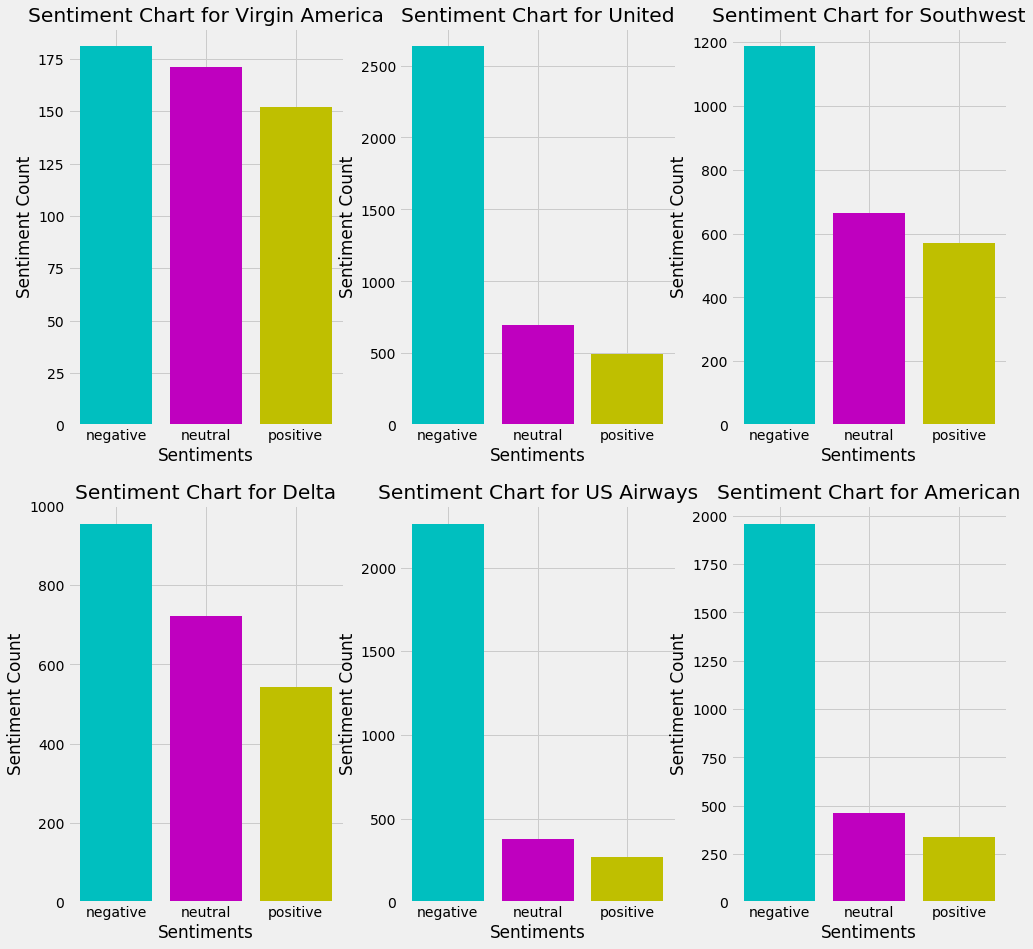

In [51]:
my_colors = 'cmy' 
plt.figure(1,figsize=(15, 15))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=my_colors)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiment Count')
    plt.xlabel('Sentiments')
    plt.title('Sentiment Chart for '+i)





### Creating a Word cloud for understanding the frequency of the Words


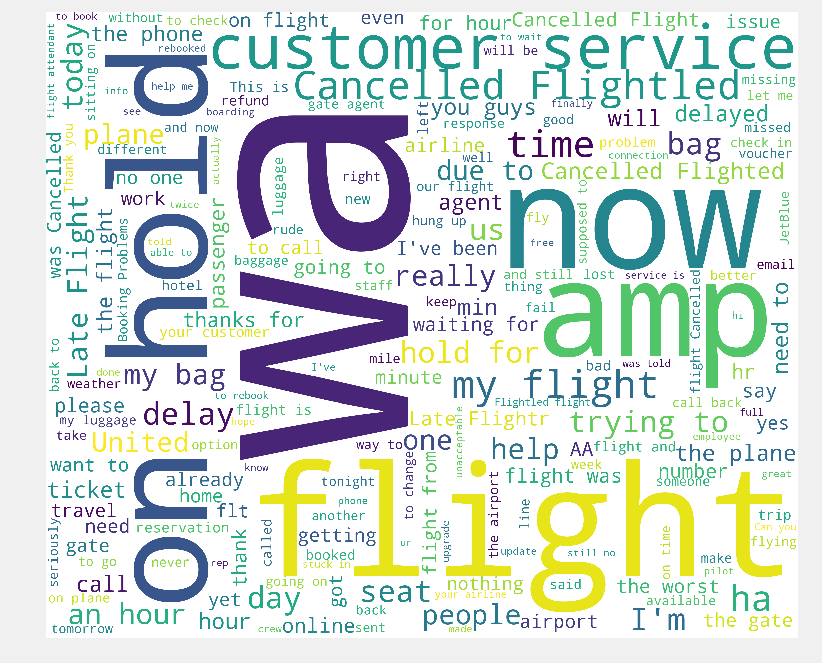

In [52]:
# Wordcloud for Negative sentiments of tweets
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

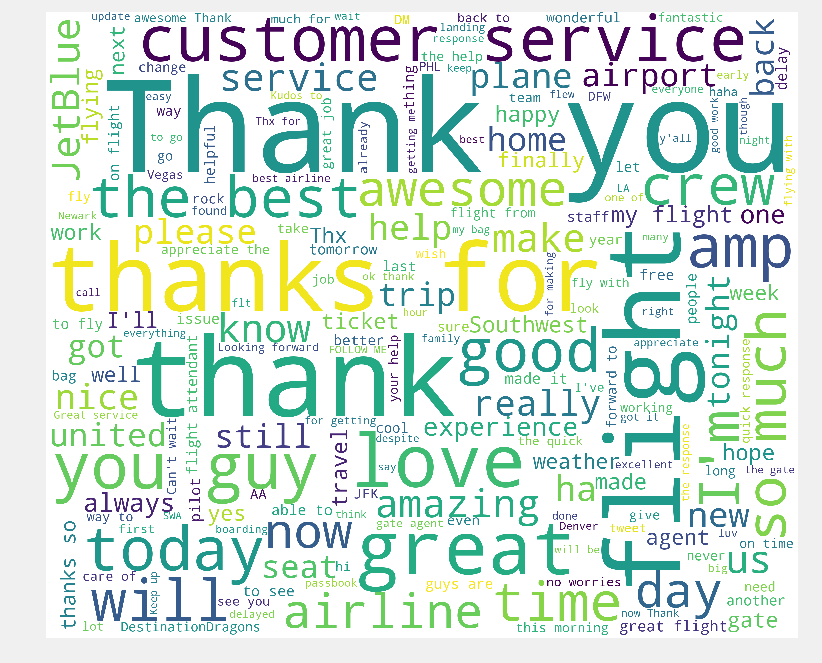

In [53]:
# Wordcloud for Possitive sentiments of tweets
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Calculating the higehest frequency of possitive sentiment words

In [22]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

### Removing stop words from the data using NLTK

In [30]:
from nltk.corpus import stopwords
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))

In [32]:
#The data is split in the standard 80,20 ratio.
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.2,random_state=42)


In [33]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [37]:
# Pediciting sentiments from tweet text data 
#DecisionTree Classifier
#randomForest Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]


Accuracy of DecisionTreeClassifieris 0.6864754098360656
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80      1849
     neutral       0.46      0.41      0.44       645
    positive       0.55      0.59      0.57       434

   micro avg       0.69      0.69      0.69      2928
   macro avg       0.60      0.60      0.60      2928
weighted avg       0.68      0.69      0.68      2928



<Figure size 432x288 with 0 Axes>

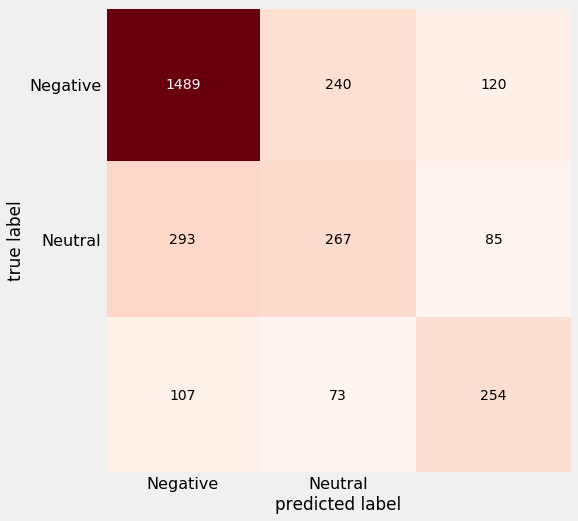

Accuracy of RandomForestClassifieris 0.7711748633879781
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      2100
     neutral       0.46      0.58      0.51       457
    positive       0.60      0.74      0.67       371

   micro avg       0.77      0.77      0.77      2928
   macro avg       0.66      0.71      0.68      2928
weighted avg       0.80      0.77      0.78      2928



<Figure size 432x288 with 0 Axes>

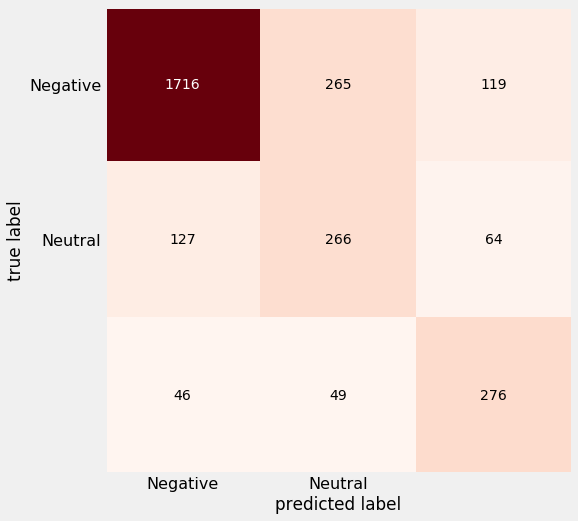

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cm=confusion_matrix(pred , test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()

##### We have plotted the confusion Matrix in Decision tree and Random forest classifier for both Predicted sentiments and actual sentiments.
##### As per our analysis it is observed that Random Forest Classifier provides better accuracy score and precision score
##### We have analysed the True possitive, True negetive, False possitive and False negetive for  all the sentiments which are Possitive, Negetive and Neutral,  Here as well Random Forest classifier gives significantly better outcome than Decision Tree Classifier.